In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from skimage import data

mpl.rcParams["font.size"] = 18

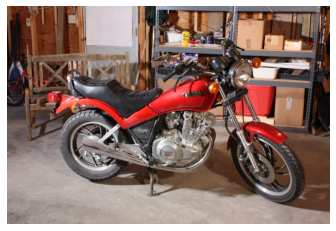

In [4]:
 
cycle_images = data.stereo_motorcycle()
image=cycle_images[0]
plt.imshow(image)
plt.axis("off")
plt.show()

In [11]:
image.shape


(500, 741, 3)

In [5]:
from sklearn.decomposition import PCA

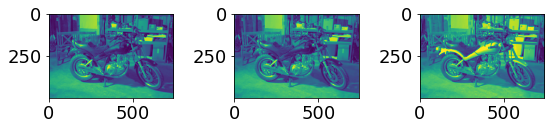

In [6]:
import numpy as np
red=np.zeros([500,741])
blue=np.zeros([500,741])
green=np.zeros([500,741])

green=image[:,:,0]
blue= image[:,:,1]
red=image[:,:,2]

fig, axes = plt.subplots(1, 3, figsize=(8, 4))
ax = axes.ravel()

 
ax[0].imshow(red)
ax[1].imshow(blue)
ax[2].imshow(green)

fig.tight_layout()

In [14]:
#initialize PCA with first 20 principal components
pca = PCA(200)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
 
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

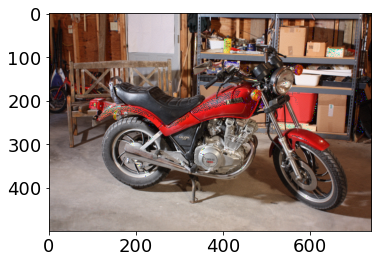

In [15]:
img_compressed = (np.dstack((green_inverted, blue_inverted, red_inverted))).astype(np.uint8)
plt.imshow(img_compressed)